# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy
from scipy import stats
import itertools

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read data

In [2]:
acc_data = pd.read_csv("accounts.csv")

# Remove duplicate rows
acc_data = acc_data.drop_duplicates()

# Remove rows with null values
acc_data = acc_data.dropna()

# Extract the first 8 features
acc_data_inp = acc_data.iloc[:, :8]
acc_data_inp_original = acc_data.iloc[:,:8]
acc_data_tar = acc_data["deposit"]
print(len(acc_data_inp))
# Convert categorical columns to numeric using one-hot encoding
acc_data_inp = pd.get_dummies(acc_data_inp, drop_first=True)

11162


# Basic data visualisation and scale analysis

### Target visualisation for curiosity

(array([5289.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5873.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

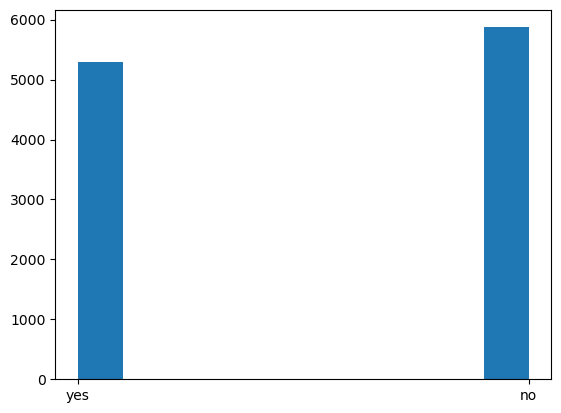

In [3]:
plt.hist(acc_data_tar)

# Input variables visualization for curiosity

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


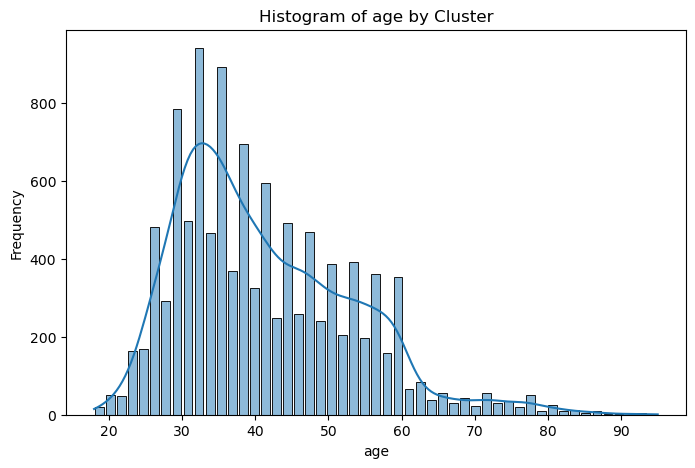

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


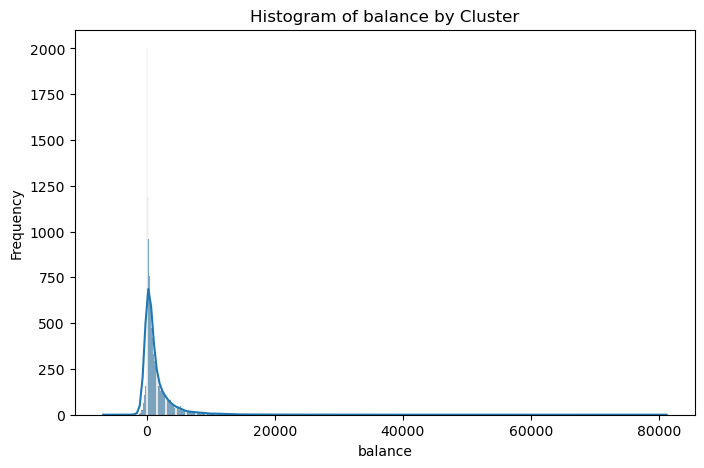

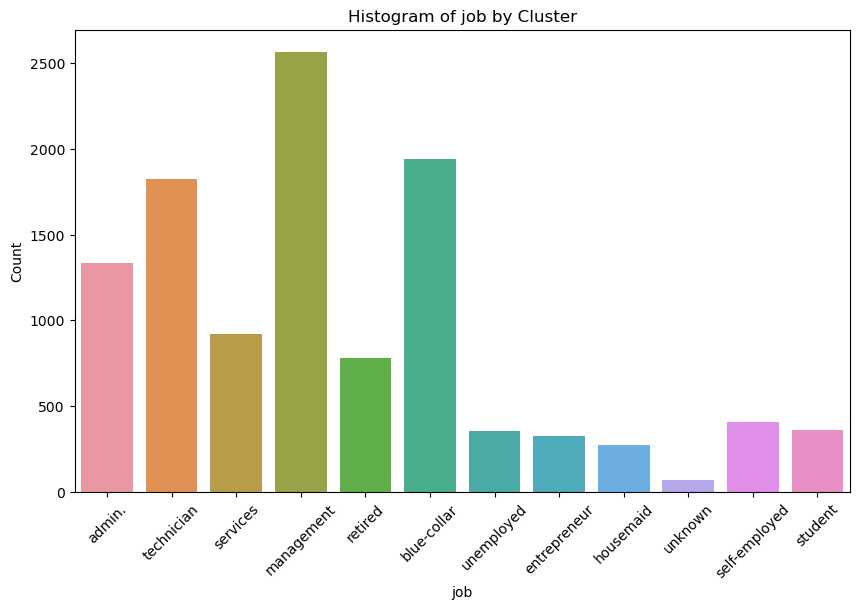

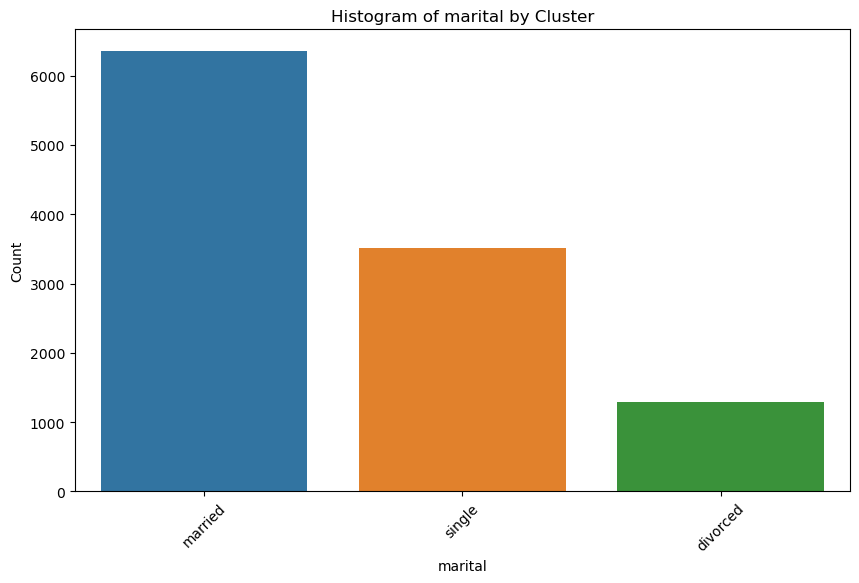

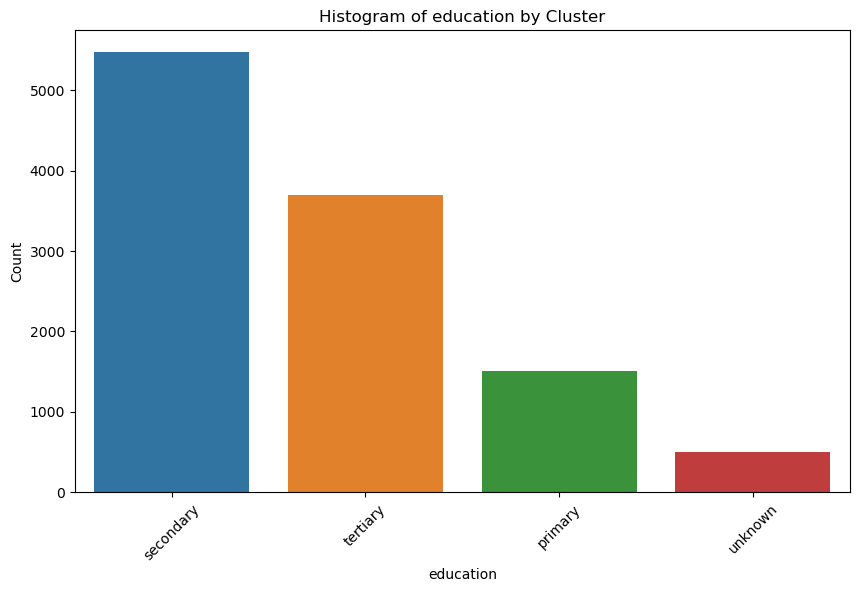

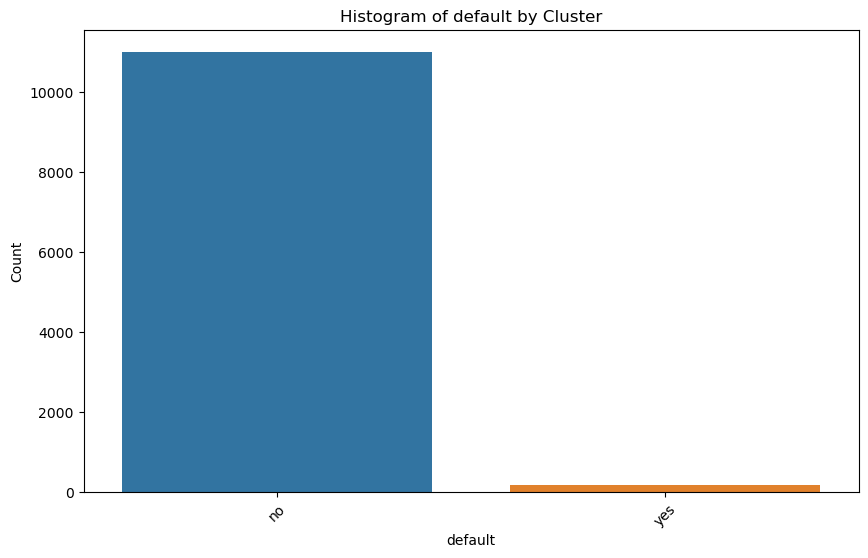

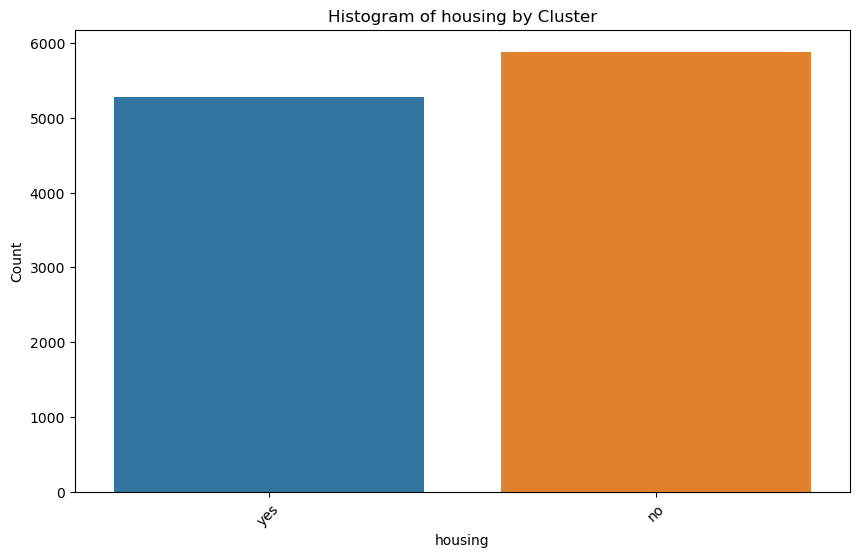

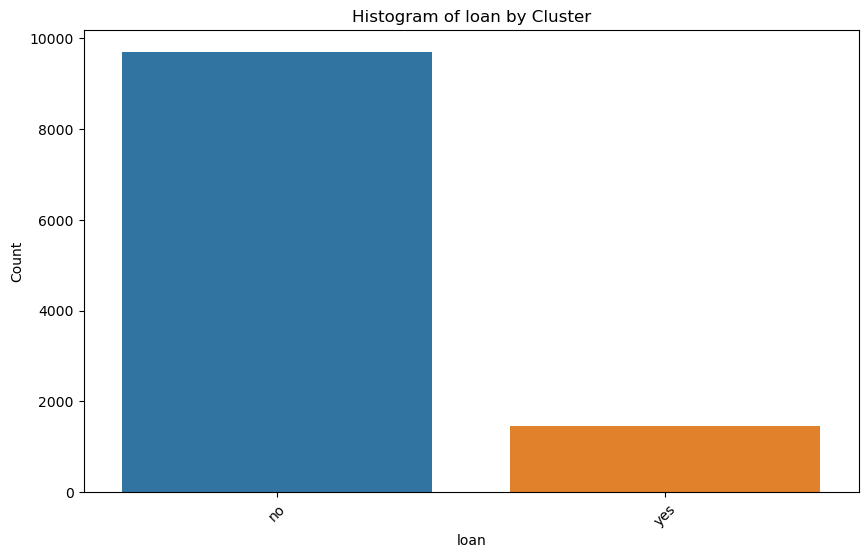

In [4]:
# Plot histograms for numerical variables
numerical_columns = ['age', 'balance']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=acc_data_inp_original, x=column, kde=True, multiple='dodge', shrink=0.8)
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for categorical/binary columns using labels of each person as x-axis
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=acc_data_inp_original, x=column, dodge=True)
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 1) MinMaxScaler Normalization

In [5]:
scaler = MinMaxScaler()
acc_inp_MM = scaler.fit_transform(acc_data_inp)

### a) SSE using _inertia

In [6]:
SSE =[]
k_values = [2, 3, 4, 5, 6, 7, 8]
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(acc_inp_MM)
    SSE.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

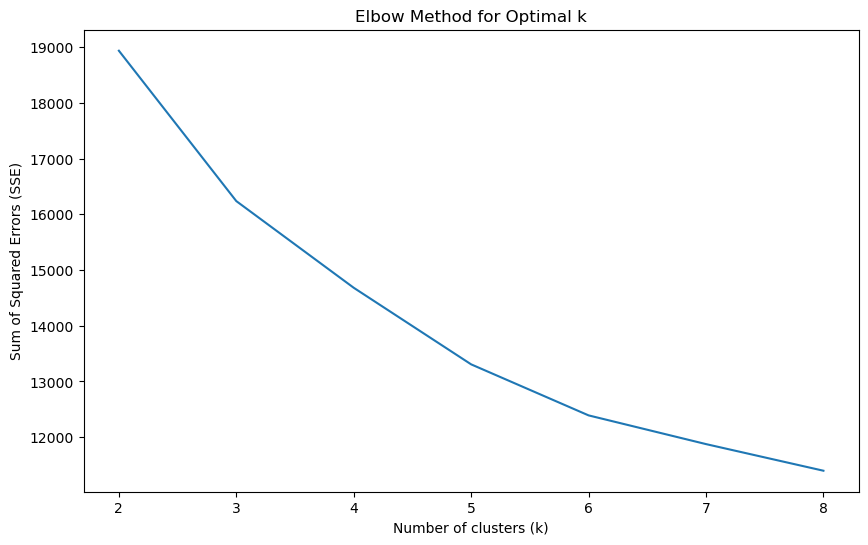

In [7]:
# Plot the sum of squared errors (SSE) for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, SSE)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

### b) Comments
From the previous graph we need to look out for the elbow in it. 
The elbow in this case is not too obvious it could be either the 
Number of clusters = 3 or the number of clusters = 6.

# c) k-modes might be better?
 Yes, K-modes might be a better clustering approach for this dataset 
 because most of the features are categorical, such as 'job', 'marital',
  'education', 'default', 'housing', and 'loan'. K-means works better 
  with numerical data, which in this case only represents 2 out of the 
  8 features selected for analysis. K-modes, on the other hand, is 
  specifically designed to handle categorical variables, making it more
   suitable for this dataset specifically, where categorical features 
   play a significant role.


# 2) StandardScaler Normalization

In [8]:
scaler      = StandardScaler()
acc_inp_Std = scaler.fit_transform(acc_data_inp)

a) Apply PCA and tell how much variability comes from the top 2 components

In [9]:
# Apply PCA to the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(acc_inp_Std)
pca_variance = pca.explained_variance_ratio_
# How much variability is explained by the top 2 components?
variability_total        = np.sum(pca_variance)
print(f"Variability explained by the top 2 components: {variability_total*100:.2f} %")

Variability explained by the top 2 components: 22.95 %


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


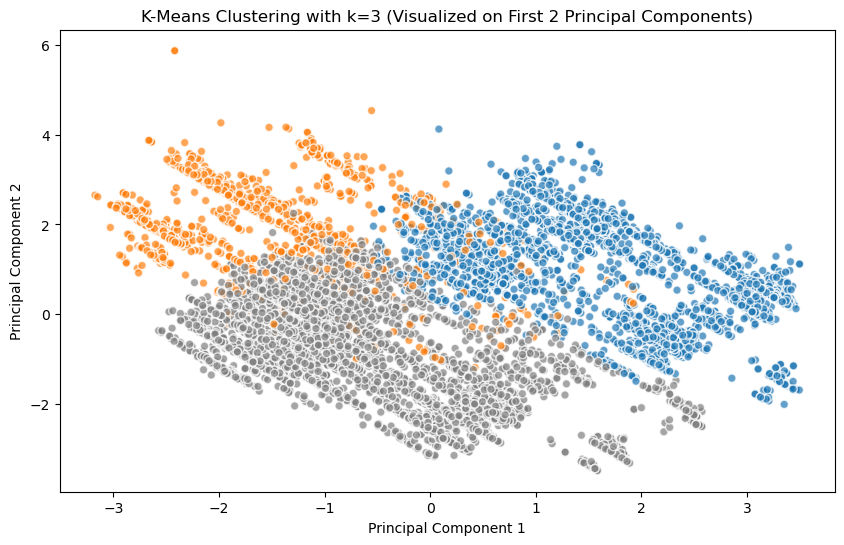

In [10]:
# Apply k-means clustering with k=3 and random_state=42 on the original 8 features
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(acc_inp_Std)
labels = kmeans_3.labels_

# Scatterplot of the first 2 principal components with k-means labels
colors = ["#1f77b4","#ff7f0e","#7f7f7f"]
colormap = ListedColormap(colors)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap=colormap, alpha=0.7, edgecolors='w')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with k=3 (Visualized on First 2 Principal Components)')
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


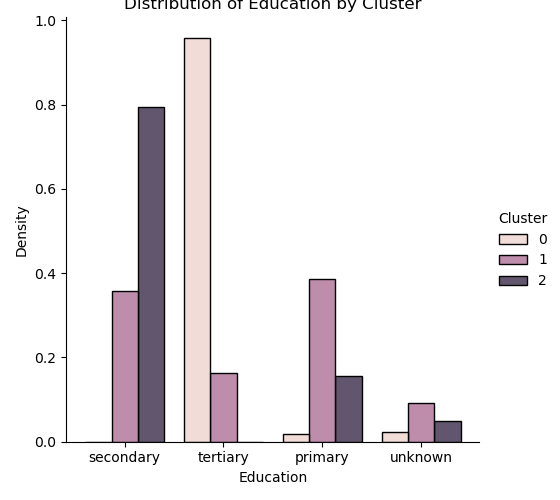

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


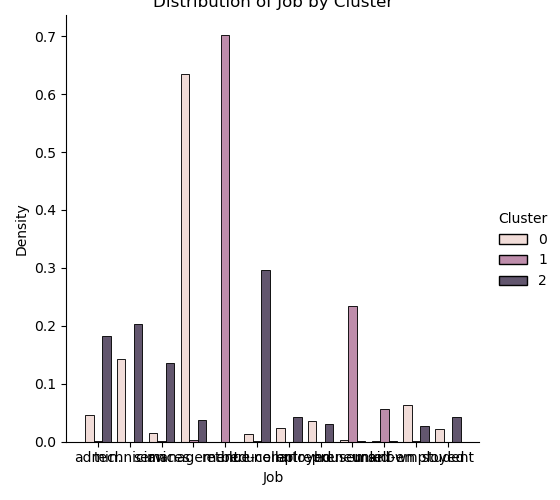

In [16]:
%matplotlib widget
clustered_data = acc_data_inp_original.copy()
clustered_data['Cluster'] = labels
# Plot distribution of 'education' according to the clusters
sns.displot(data=clustered_data, x='education', hue='Cluster', multiple="dodge",
            stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Education by Cluster')
plt.xlabel('Education')
plt.ylabel('Density')
plt.show()


# Plot distribution of 'job' according to the clusters
sns.displot(data=clustered_data, x='job', hue='Cluster', multiple="dodge",
            stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Job by Cluster')
plt.xlabel('Job')
plt.ylabel('Density')
plt.show()

From these education displot we can see that cluster 0 is mostly related
 to people that have tertiary education, cluster 2 mainly for people that
  have finished secondary or lower, and the cluster 1 is more evenly 
  distributed along all the 4 classes.
Looking at the jobs displot, we can see that cluster 1 is mostly related
 to retired people, having another significant portion in housemaids and
  unknown jobs after that we can see that cluster 0 is mainly related to
   management and to technicians, and lastly the cluster 3 has a close
    relationship to the blue-collar, technician, admin and services in a 
    similar proportion.
Looking at both displots we can see that there seems to be a connection 
between attending tertiary education and having a job in management, and
 that most of the retired people have probably have not attended 
 tertiary education.